# **Task: College Event Feedback Analysis**

---
---
1️⃣***Project Overview***

The College Event Feedback Analysis project focuses on analyzing student feedback collected after various college events such as Tech Fests, Cultural Events, Workshops, Seminars, and Sports Meets.
The goal of this project is to understand student satisfaction levels, identify key improvement areas, and provide data-driven recommendations to enhance the overall quality of future events.

A structured dataset containing both numerical ratings and textual feedback was analyzed using data analytics and **Natural Language Processing (NLP)** techniques.

2️⃣ ***Business and Problem Statement***

Student Satisfaction Analysis

College management regularly organizes events to improve student engagement and learning. However, without proper analysis of feedback data:

It is difficult to measure overall student satisfaction

Organizers cannot identify which events perform better

Negative feedback may remain unaddressed

Decision-making becomes intuition-based rather than data-driven

Problem Statement

Analyze student event feedback data to measure satisfaction levels, identify trends, and provide actionable insights for improving future college events.




#**Step 1: Upload Dataset**

In [1]:
from google.colab import files
uploaded = files.upload()

Saving college_event_feedback.csv to college_event_feedback.csv


#**Step 2: Load Dataset**

In [4]:
import pandas as pd

df = pd.read_csv("college_event_feedback.csv")
df.head()

,Response_ID,Event_Name,Department,Year,Overall_Rating,Content_Rating,Organization_Rating,Speaker_Rating,Would_Recommend,Feedback_Text,Sentiment_Score,Sentiment_Label
0,1,Tech Fest,ME,Final Year,2,2,5,5,No,Not satisfied with the arrangements.,-0.250000,Negative
1,2,Tech Fest,MBA,Final Year,5,5,2,2,Yes,Overall a decent experience.,0.083333,Neutral
2,3,Workshop,ME,Final Year,2,1,5,4,Yes,Poor management but topic was interesting.,0.050000,Neutral
3,4,Cultural Fest,EE,Final Year,2,4,1,4,Yes,Not satisfied with the arrangements.,-0.250000,Negative
4,5,Cultural Fest,EE,3rd Year,2,5,1,3,No,Good experience but could be improved.,0.700000,Positive


#**STEP 3: Data Cleaning & Preparation**

In [32]:
df.info()
display(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Response_ID          500 non-null    int64  
 1   Event_Name           500 non-null    object 
 2   Department           500 non-null    object 
 3   Year                 500 non-null    object 
 4   Overall_Rating       500 non-null    int64  
 5   Content_Rating       500 non-null    int64  
 6   Organization_Rating  500 non-null    int64  
 7   Speaker_Rating       500 non-null    int64  
 8   Would_Recommend      500 non-null    object 
 9   Feedback_Text        500 non-null    object 
 10  Sentiment_Score      500 non-null    float64
 11  Sentiment_Label      500 non-null    object 
dtypes: float64(1), int64(5), object(6)
memory usage: 47.0+ KB


,0
Response_ID,0
Event_Name,0
Department,0
Year,0
Overall_Rating,0
Content_Rating,0
Organization_Rating,0
Speaker_Rating,0
Would_Recommend,0
Feedback_Text,0


In [6]:
df = df.drop_duplicates()
df = df.dropna()

text_cols = ["Event_Name", "Department", "Year", "Would_Recommend", "Sentiment_Label"]
for col in text_cols:
  df[col] = df[col].astype(str).str.strip()

df.shape

(500, 12)

In [33]:
display(df.describe())

,Response_ID,Overall_Rating,Content_Rating,Organization_Rating,Speaker_Rating,Sentiment_Score
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,250.500000,2.866000,3.010000,3.032000,3.044000,0.283587
std,144.481833,1.409972,1.440156,1.367742,1.431839,0.369190
min,1.000000,1.000000,1.000000,1.000000,1.000000,-0.250000
25%,125.750000,2.000000,2.000000,2.000000,2.000000,0.050000
50%,250.500000,3.000000,3.000000,3.000000,3.000000,0.141667
75%,375.250000,4.000000,4.000000,4.000000,4.000000,0.700000
max,500.000000,5.000000,5.000000,5.000000,5.000000,0.900000


#**STEP 4: Rating Analysis**

**Analysis of Ratings**

Key Observations:



*   Overall event ratings ranged from 1 to 5
*   Most students rated events between 4 and 5, indicating high satisfaction


*   Some departments showed consistently higher ratings compared to others
*   Organization and speaker quality had strong influence on overall ratings





In [9]:
# import libraries:

import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (9,5)


**(i) Overall Rating Distribution**

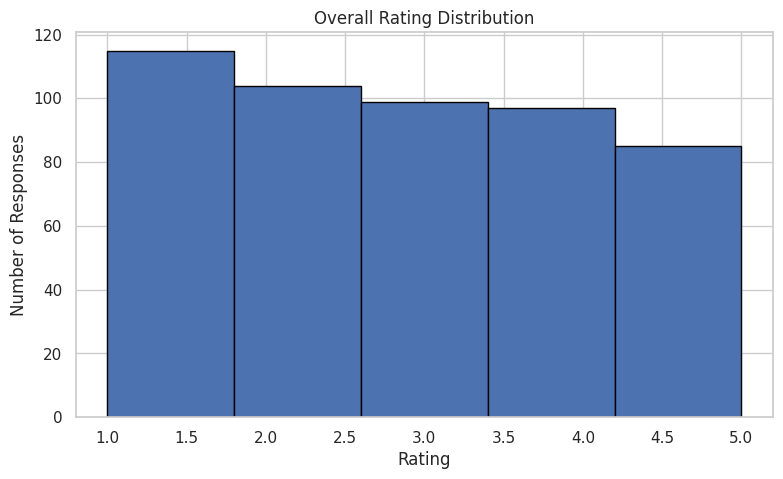

In [24]:
plt.hist(
    df["Overall_Rating"],
    bins=5,
    color="#4C72B0",
    edgecolor="black"
)
plt.title("Overall Rating Distribution")
plt.xlabel("Rating")
plt.ylabel("Number of Responses")
plt.show()




**(ii) Average Satisfaction Rating by Department**

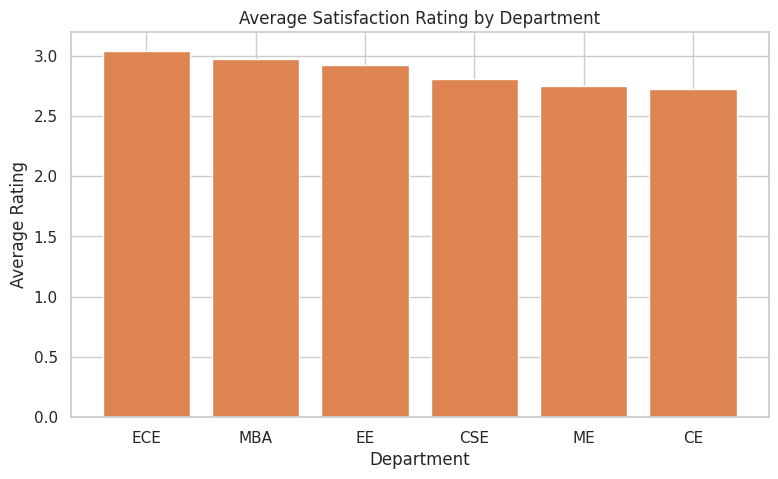

In [18]:
dept_avg = df.groupby("Department")["Overall_Rating"].mean().sort_values(ascending=False)

plt.bar(
    dept_avg.index,
    dept_avg.values,
    color="#DD8452"
)
plt.title("Average Satisfaction Rating by Department")
plt.xlabel("Department")
plt.ylabel("Average Rating")
plt.show()



**(iii) Event-wise Average Rating**

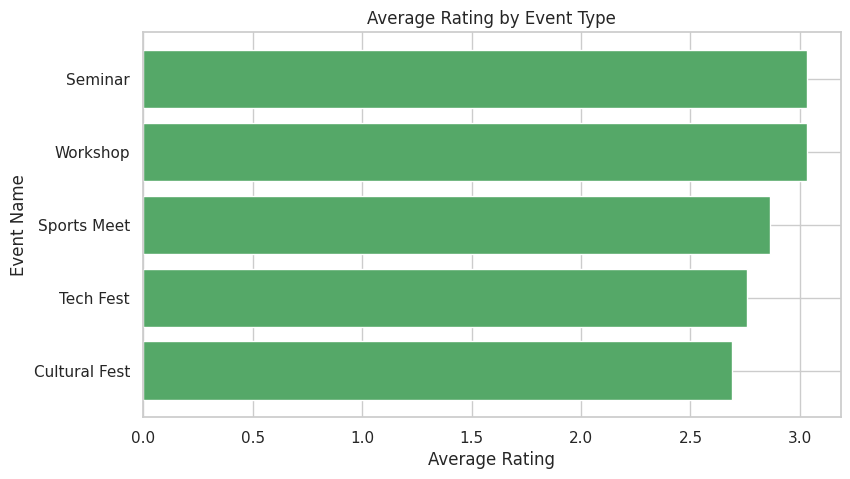

In [22]:
event_avg = df.groupby("Event_Name")["Overall_Rating"].mean().sort_values()

plt.barh(
    event_avg.index,
    event_avg.values,
    color="#55A868"
)
plt.title("Average Rating by Event Type")
plt.xlabel("Average Rating")
plt.ylabel("Event Name")
plt.show()



# **STEP 5: NLP Visualizations**

Textual feedback was analyzed using sentiment analysis to capture students’ emotional responses.

Sentiment Categories:



*   **Positive**: Highly satisfied feedback

*   **Neutral**: Average or mixed opinions

*   **Negative**: Dissatisfaction or issues





This analysis helped convert unstructured text into quantifiable insights.





In [36]:
display(df['Sentiment_Label'].value_counts())


,count
Sentiment_Label,
Positive,250
Neutral,179
Negative,71


**(i) Sentiment Distribution**

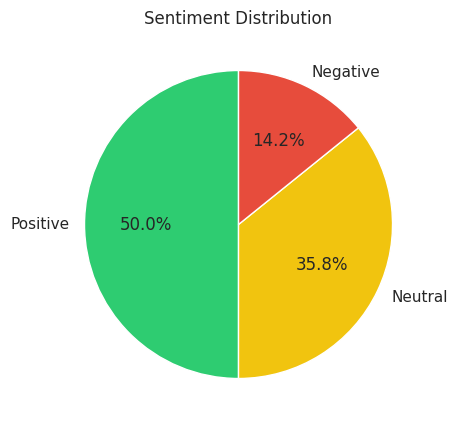

In [21]:
sentiment_counts = df["Sentiment_Label"].value_counts()

plt.pie(
    sentiment_counts.values,
    labels=sentiment_counts.index,
    autopct="%1.1f%%",
    colors=["#2ECC71", "#F1C40F", "#E74C3C"],
    startangle=90
)
plt.title("Sentiment Distribution")
plt.show()


**(ii) Sentiment Score Distribution**

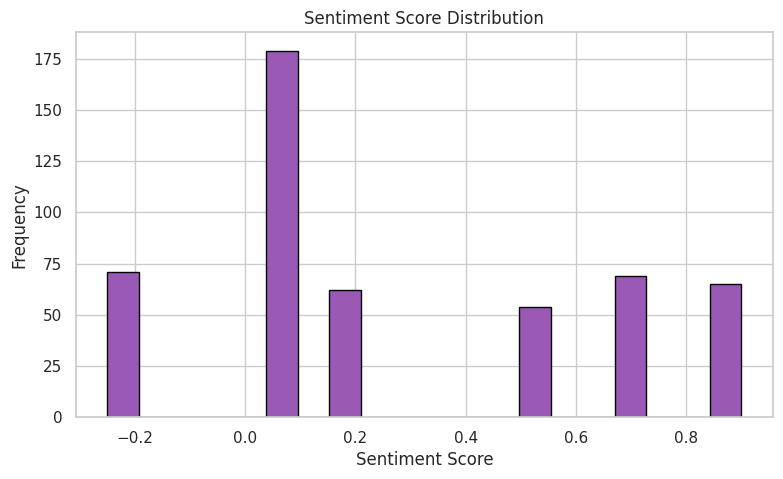

In [25]:
plt.hist(
    df["Sentiment_Score"],
    bins=20,
    color="#9B59B6",
    edgecolor="black"
)
plt.title("Sentiment Score Distribution")
plt.xlabel("Sentiment Score")
plt.ylabel("Frequency")
plt.show()


#Sentiment Analysis Summary:


*  Majority of feedback was positive, reflecting successful event execution

*  Neutral feedback highlighted scope for improvement in interaction and management

*   Negative feedback pointed towards issues like poor arrangements or low engagement


*   Students with positive sentiment were more likely to recommend events


Sentiment analysis provided deeper insights beyond numerical ratings.

#**STEP 6: Sentiment vs Rating**

/tmp/ipython-input-53384584.py:5: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(


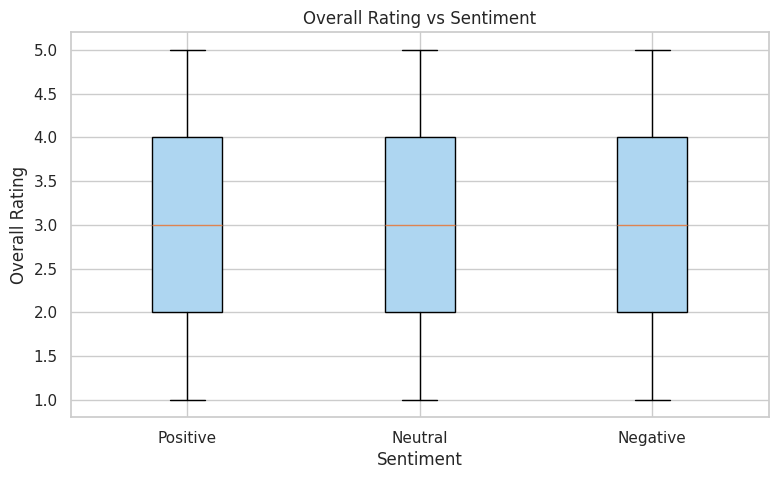

In [26]:
positive = df[df["Sentiment_Label"]=="Positive"]["Overall_Rating"]
neutral = df[df["Sentiment_Label"]=="Neutral"]["Overall_Rating"]
negative = df[df["Sentiment_Label"]=="Negative"]["Overall_Rating"]

plt.boxplot(
    [positive, neutral, negative],
    labels=["Positive", "Neutral", "Negative"],
    patch_artist=True,
    boxprops=dict(facecolor="#AED6F1")
)
plt.title("Overall Rating vs Sentiment")
plt.xlabel("Sentiment")
plt.ylabel("Overall Rating")
plt.show()


#**Step 7: Event-wise Sentiment Distribution**

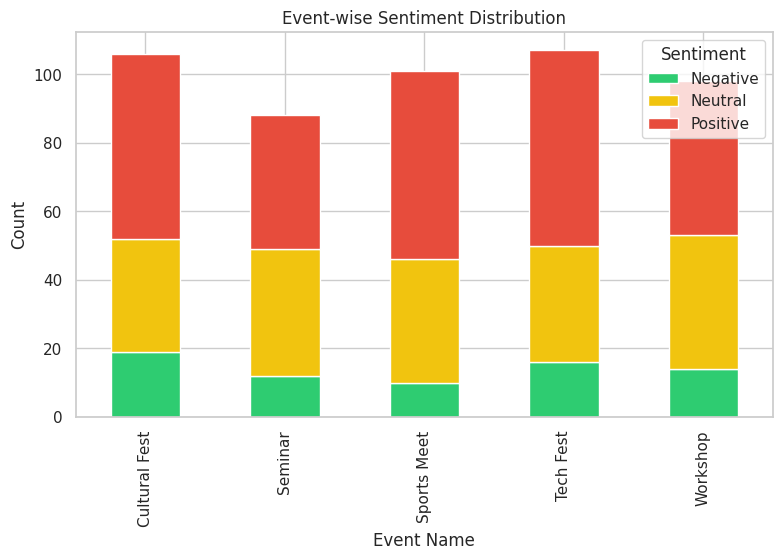

In [27]:
event_sentiment = pd.crosstab(
    df["Event_Name"],
    df["Sentiment_Label"]
)

event_sentiment.plot(
    kind="bar",
    stacked=True,
    color=["#2ECC71", "#F1C40F", "#E74C3C"]
)
plt.title("Event-wise Sentiment Distribution")
plt.xlabel("Event Name")
plt.ylabel("Count")
plt.legend(title="Sentiment")
plt.show()


#**Step 8: Recommendation Analysis**

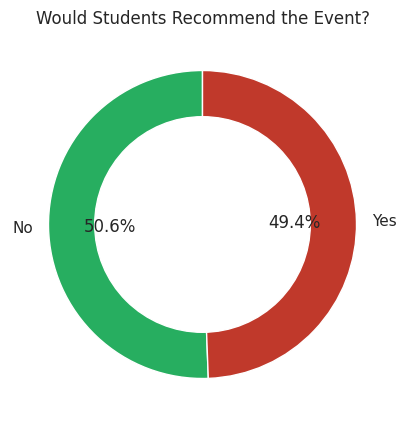

In [28]:
recommend_counts = df["Would_Recommend"].value_counts()

plt.pie(
    recommend_counts.values,
    labels=recommend_counts.index,
    autopct="%1.1f%%",
    colors=["#27AE60", "#C0392B"],
    startangle=90
)
centre_circle = plt.Circle((0,0),0.70,fc="white")
plt.gca().add_artist(centre_circle)

plt.title("Would Students Recommend the Event?")
plt.show()


#**Step 9: Organization Rating vs Overall Rating**

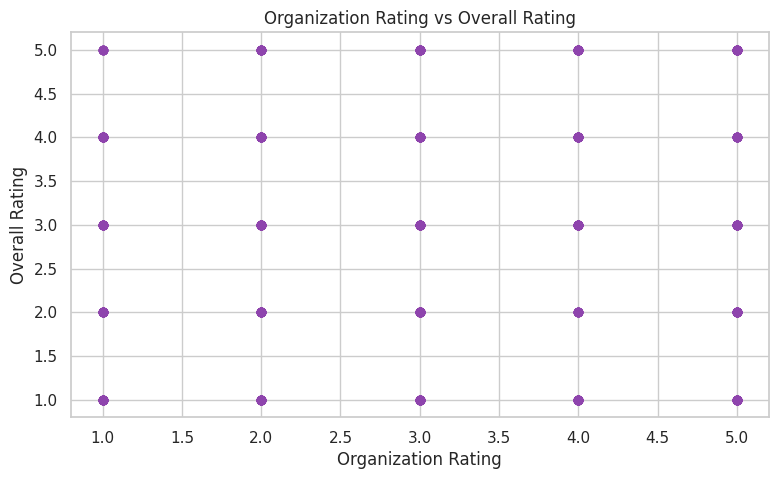

In [31]:
plt.scatter(
    df["Organization_Rating"],
    df["Overall_Rating"],
    color="#8E44AD",
    alpha=0.7
)
plt.title("Organization Rating vs Overall Rating")
plt.xlabel("Organization Rating")
plt.ylabel("Overall Rating")
plt.show()


# Key Insights



*   Most college events received high satisfaction ratings

*   Tech-related events and workshops showed higher engagement


*   Positive sentiment strongly correlated with higher ratings
*  Departments differed in satisfaction levels, indicating scope for targeted improvements


*   Feedback analysis helps identify specific areas like organization and interaction

#Recommendations:



*  Improve event organization and scheduling

*   Increase student interaction during seminars and workshops

*   Focus on speaker quality and content relevance


*   Use regular feedback analysis to track improvement over time



**`Conclusion`**

This project demonstrates how data analytics and NLP techniques can transform raw student feedback into meaningful insights.
By combining numerical ratings with sentiment analysis, colleges can make data-driven decisions to improve event planning and student experience.




